# Import Libraries

In [66]:
#Libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

# Import Data

In [52]:
movies = pd.read_csv("Movies Clean.csv")

# Prepare Data for the Modelling

In [53]:
model_data = movies[['userId','movie_title']]

For the recommendation system, we only choose the user id and the movies that they have watch, to create the recommendation algorithm for a movie based on user.

In [55]:
encoded_df = pd.crosstab(model_data["userId"], model_data["movie_title"])

#display
encoded_df.head()

movie_title,$9.99,'Neath the Arizona Skies,(500) Days of Summer,...And Justice for All,1-900,10,10 Attitudes,10 Items or Less,10 Things I Hate About You,10 Years,...,Zoot Suit,Zorba the Greek,Zulu,[REC],eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,İtirazım Var
userId,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Encode the dataset for easier analysis of clustering

# K-Means Clustering Recommendation

In [56]:
pca = PCA(n_components=3)
pca.fit(encoded_df)
pca_samples = pca.transform(encoded_df)

The use of pca in the modelling is to simplifies the complexity in high-dimensional data while retaining trends and patterns

In [57]:
scores = []
inertia_list = []

for i in tqdm(range(2,50)):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_samples)
    inertia_list.append(kmeans.inertia_)
    scores.append(silhouette_score(pca_samples, kmeans.labels_))

100%|██████████| 48/48 [00:09<00:00,  4.86it/s]


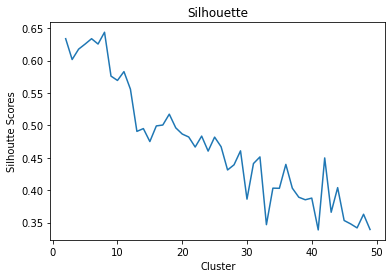

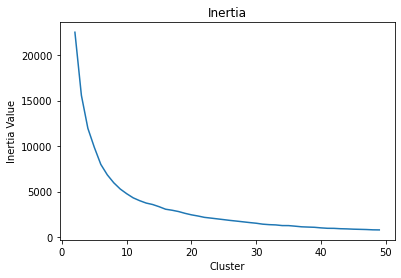

In [58]:
plt.plot(range(2,50), scores)
plt.title("Silhouette")
plt.xlabel("Cluster")
plt.ylabel("Silhoutte Scores")
plt.show()

plt.plot(range(2,50), inertia_list)
plt.title("Inertia")
plt.xlabel("Cluster")
plt.ylabel("Inertia Value")
plt.show()

# Created the cluster of movies

In [59]:
clusterer = KMeans(n_clusters=20,random_state=30, n_init=30).fit(pca_samples)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(pca_samples)

In [61]:
encoded_df['cluster'] = c_preds

In [68]:
cluster_1 = encoded_df[encoded_df['cluster']==1].drop('cluster',axis=1).sum()

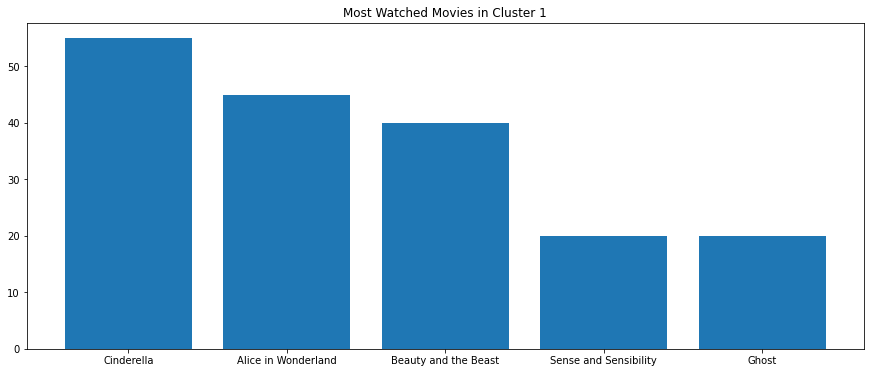

In [79]:
plt.figure(figsize=(15,6))
plt.bar(cluster_1.sort_values(ascending=False)[:5].keys(),
        cluster_1.sort_values(ascending=False)[:5].values)
plt.title("Most Watched Movies in Cluster 1")
plt.show()

In [70]:
def recommend_movies(movie_name):
    cluster_number = encoded_df.groupby("cluster").sum()[movie_name].argmax()
    columns = ["cluster"]+[movie_name]
    recommended_movies = encoded_df[encoded_df.cluster==cluster_number]
    recommended_movies = list(recommended_movies.drop(columns,axis=1).sum().sort_values(ascending=False)[:5].keys())
    print(recommended_movies)

In [84]:
movieName = input()
recommend_movies(movieName)

Beauty and the Beast
['Aladdin', 'Ghost', 'Batman', 'Dances with Wolves', 'Pulp Fiction']


If the users watch Titanic movie then they can watch Ghost, Armageddon, Ghostbusters, Forrest Gump, and Ocean's Eleven because users who watch Titanic movie, most of them watch the movies in order.

# Association Rules Mining

In [72]:
records = []
for user in range(0,encoded_df.shape[0]):
    records.append([i for i in encoded_df.iloc[user,:].values*encoded_df.columns if len(i)>0])

In [73]:
trans_encoder = TransactionEncoder()
trans_data = trans_encoder.fit(records).transform(records)
trans_df = pd.DataFrame(trans_data, columns=trans_encoder.columns_)
trans_df = trans_df.replace({False:0})
trans_df.head()

,$9.99,'Neath the Arizona Skies,(500) Days of Summer,...And Justice for All,1-900,10,10 Attitudes,10 Items or Less,10 Things I Hate About You,10 Years,...,clusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclustercluster,clusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclustercluster,clusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclustercluster,clusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclusterclustercluster,eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,İtirazım Var
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
trans_df = apriori(trans_df, min_support = 0.2, use_colnames = True)
trans_df

,support,itemsets
0,0.260805,(Ace Ventura: Pet Detective)
1,0.320417,(AladdinAladdin)
2,0.327869,(American Beauty)
3,0.298063,(Apollo 13)
4,0.220566,(Babe)
...,...,...
118,0.225037,"(Jurassic Park, Terminator 2: Judgment Day, Fo..."
119,0.208644,"(Jurassic Park, Forrest Gump, True Lies)"
120,0.213115,"(Pulp Fiction, Schindler's List, Forrest Gump)"
121,0.210134,"(Seven, Pulp Fiction, Forrest Gump)"


In [75]:
df_ar = association_rules(trans_df, metric = "confidence", min_threshold = 0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ace Ventura: Pet Detective),(Forrest Gump),0.260805,0.508197,0.213115,0.817143,1.607926,0.080575,2.689549
1,(Jurassic Park),(Ace Ventura: Pet Detective),0.408346,0.260805,0.205663,0.503650,1.931137,0.099165,1.489261
2,(Ace Ventura: Pet Detective),(Jurassic Park),0.260805,0.408346,0.205663,0.788571,1.931137,0.099165,2.798365
3,(Ace Ventura: Pet Detective),(Pulp Fiction),0.260805,0.482861,0.208644,0.800000,1.656790,0.082711,2.585693
4,(AladdinAladdin),(Beauty and the BeastBeauty and the BeastBeaut...,0.320417,0.269747,0.213115,0.665116,2.465707,0.126683,2.180618
...,...,...,...,...,...,...,...,...,...
139,(Seven),"(Pulp Fiction, Forrest Gump)",0.299553,0.344262,0.210134,0.701493,2.037669,0.107009,2.196721
140,"(Pulp Fiction, Terminator 2: Judgment Day)",(Forrest Gump),0.241431,0.508197,0.208644,0.864198,1.700518,0.085950,3.621461
141,"(Pulp Fiction, Forrest Gump)",(Terminator 2: Judgment Day),0.344262,0.353204,0.208644,0.606061,1.715893,0.087049,1.641866
142,"(Terminator 2: Judgment Day, Forrest Gump)",(Pulp Fiction),0.274218,0.482861,0.208644,0.760870,1.575751,0.076235,2.162580


In [76]:
df_ar.loc[13]

antecedents                    (Apollo 13)
consequents           (Dances with Wolves)
antecedent support                0.298063
consequent support                0.301043
support                           0.201192
confidence                           0.675
lift                              2.242203
leverage                          0.111463
conviction                        2.150636
Name: 13, dtype: object

30% of people watched Apollo 13 (antecedent support)

30% of people watched Dances with Wolves (consequent support)

20% of people watched both of them (support)

68% of people who watched Apollo 13 also watched Jurassic Park (confidence)

The people who watched them both is 11% more than who watched them separately (leverage)

The rate of the movies related each other is 2.15 (conviction)